# Assignment 6

### Instructions

* Write your code in the cells provided.  Where appropirate, enter markdown to answer questions.

* Submit this notebook to owl.

---


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 500)
from IPython.display import display
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


%matplotlib inline

### You're a Data Scientist...Which is Just a Statistician on a Mac, Right?

Your models from the last assignment really impressed some of the management in your football club.  In the spirit of Moneyball (it was a book before it was a movie, I recomend you read it), managers want to test some hypotheses relating a player's overall rating and some of their characteristics in order to make better decisions on what players to trade/sign.

Management heard somewhere on the internet that statistics and data science are more or less the same thing (the truth of this is the subject of many debates) and would now like you to create some *statistical models* for inference instead of prediction.

In this assignment, you're going to take off your "data" hat and put on your "science" hat.

### The Dataset

To test some of the management's hypotheses, the football club has spent some money to go out and collect new data in `footballer_sample.csv`.  The variables are more or less the same from the previous dataset.

The data contain 52 columns, including some information about the player, their skills, and their overall measure as an effective footballer.

Most features relate to the player's abilities in football related skills, such as passing, shooting, dribbling, etc.  Some features are rated on a 1-5 scale (5 being the best), others are rated on 0-100 (100 being the best), and others still are categorical (e.g. work rate is coded as low, medium, or high).

The target variable (or $y$ variable, if you will) is `overall`.  This is an overall measure of the footballer's skill and is rated from 0 to 100.  The most amazingly skilled footballer would be rated 100, where as I would struggle to score more than a 20. The model(s) you build should use the other features to predict `overall`.



### Part A

Read in the data and take a look at the dataframe.  There should be 52 columns. The outcome of interest is called `overall` which gives an overall measure of player performance. Not all of the other columns are particularly useful for modelling though (for instance, `ID` is just a unique identifier for the player.  This is essentially an arbitrary number and has no bearing on the player's rating).

Remember that the Senior Data Scientist from the last assignment thinks the following columns should be removed:

* ID
* club
* club_logo
* birth_date
* flag
* nationality
* photo
* potential


That still sounds like a pretty good idea.  Remove those columns.  Keep the categorical variables as they are encoded.  Statsmodels will automatically dummy encode them for us

In [6]:
df = pd.read_csv("sampled_footballers.csv")
model_data = df.drop(["ID","club","club_logo","birth_date","flag","nationality","photo","potential"],axis = "columns")
model_data.head()


,age,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle
0,20,175.0,70.0,58,65,30,38,56,60,53,1,3,3,Medium,High,Right,55,27,53,33,26,63,33,32,27,41,68,62,54,55,75,27,55,62,47,30,54,60,54,40,45,43,53,70
1,29,183.0,80.0,65,83,62,58,64,55,80,1,2,3,High,High,Right,63,59,64,62,55,62,46,59,43,64,81,85,73,68,65,70,75,90,77,59,78,53,60,61,68,65,52,56
2,35,183.0,78.0,67,46,66,63,66,50,71,1,3,3,High,Low,Right,51,67,69,69,61,65,63,65,64,66,34,55,78,66,51,65,72,54,80,63,67,59,70,64,67,65,45,43
3,24,178.0,72.0,69,77,69,48,70,21,39,1,3,3,Medium,Medium,Right,49,70,67,62,66,67,37,43,39,68,71,81,91,70,78,68,28,34,34,70,59,25,73,34,59,54,11,17
4,23,173.0,73.0,70,79,64,64,72,21,55,1,3,3,Medium,Medium,Right,66,66,58,68,64,70,46,48,59,71,76,82,79,68,78,65,34,69,57,59,36,19,67,66,63,63,13,18


### Part B

In statistics, it is useful to *standardize* our data to have mean 0 and standard deviation 1.  This has the effect of putting all the variables on the same scale.  It also has the added benefit of easing the interpretation of the coefficients to the following:

>Every 1 standard deviation change in the predictor $x$ results in a change of $\beta$ in the outcome.

Here, $\beta$ is the coefficient from the linear model we fit to the data. Standardize all the numeric variables.  A good way to check that you've done this correctly is to compute the means (which should be close to 0) and the standard deviations (which should be close to 1).

In [7]:
#find the numeric colmun and do the standardized procedure.
numeric_variables = model_data.drop('overall', axis = 'columns').select_dtypes(include = [np.number]).columns
model_data.loc[:, numeric_variables] = (model_data.loc[:, numeric_variables] - model_data.loc[:, numeric_variables].mean())
model_data.loc[:, numeric_variables] = model_data.loc[:, numeric_variables]/model_data.loc[:,numeric_variables].std()

#check the mean and std.
np.mean(model_data)
np.std(model_data)
model_data
                                                         

,age,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle
0,-1.085679,-0.948403,-0.746947,58,-0.186810,-1.550772,-1.785811,-0.559266,0.569233,-1.130208,-0.323097,0.984820,0.115733,Medium,High,Right,0.335059,-0.863864,0.016788,-1.584024,-0.891996,0.456401,-0.712817,-0.605601,-1.604627,-0.968434,0.272152,-0.120430,-0.572093,-0.783366,0.813860,-1.565589,-0.845005,-0.001922,-1.336457,-0.810886,-0.081026,0.631650,0.283359,-0.921896,-0.215637,-1.046575,0.358621,0.995533
1,0.847663,0.276528,0.738037,65,1.445514,0.673753,0.093001,0.182220,0.277259,1.540509,-0.323097,-0.386796,0.115733,High,High,Right,0.775057,0.787292,0.636490,0.295392,0.761538,0.404002,-0.005657,0.975756,-0.568715,0.412813,1.142716,1.440952,0.734684,0.664836,0.106032,0.888312,0.811542,1.679897,0.941853,0.694408,1.304030,0.286809,0.591358,0.592009,1.253453,0.591491,0.312878,0.352542
2,2.136558,0.276528,0.441040,67,-1.909819,0.951818,0.562704,0.367592,-0.014715,0.650270,-0.323097,0.984820,0.115733,High,Low,Right,0.115060,1.200080,0.918173,0.749045,1.103648,0.561201,0.919090,1.327169,0.790918,0.532921,-2.004708,-0.595633,1.078572,0.442036,-0.884925,0.602975,0.563060,-0.482442,1.169684,0.902034,0.669213,0.582387,1.104691,0.808281,1.189580,0.591491,-0.007319,-0.244520
3,-0.226416,-0.489054,-0.449950,69,0.901406,1.160368,-0.846405,0.738335,-1.708165,-2.515024,-0.323097,0.984820,0.115733,Medium,Medium,Right,0.005060,1.354876,0.805500,0.295392,1.388740,0.666000,-0.495230,0.038655,-0.827693,0.653029,0.473051,1.169407,1.972683,0.887637,1.026208,0.774177,-3.081343,-1.683741,-2.323724,1.265381,0.207528,-1.092554,1.258690,-1.354441,0.678592,-0.227542,-1.562563,-1.438645
4,-0.441232,-1.254636,-0.301452,70,1.082775,0.812786,0.656645,0.923706,-1.708165,-0.932377,-0.323097,0.984820,0.115733,Medium,Medium,Right,0.940057,1.148482,0.298471,0.684237,1.274703,0.823199,-0.005657,0.331499,0.467196,0.833192,0.807884,1.237293,1.147350,0.664836,1.026208,0.602975,-2.584379,0.418533,-0.577020,0.694408,-1.119818,-1.388132,0.950691,0.952463,0.934086,0.442576,-1.471078,-1.392717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.870863,1.348343,2.223022,69,0.085244,-0.647059,-0.376702,-1.022695,1.036391,0.848101,-0.323097,-0.386796,0.115733,Medium,High,Right,-0.709938,0.116510,0.523817,0.295392,-0.492867,-0.486793,-0.332039,-0.371326,0.855663,-0.007567,0.205185,0.286887,-0.572093,0.776237,-0.389446,-0.424239,1.225679,-0.061987,1.549403,-0.395633,0.149817,1.124280,-1.051304,0.015283,-0.279510,0.368118,0.999015,0.949605
496,-0.011600,0.582761,1.629028,71,-2.091189,-0.786091,-0.188821,-1.393438,1.328365,0.551355,-0.323097,-0.386796,0.115733,Medium,High,Right,0.335059,-0.347878,1.256192,0.295392,-0.036720,-0.539193,-0.060054,0.272931,0.596685,-0.488000,-1.268077,-1.342381,-1.466204,0.999037,-1.026491,0.032300,-0.348041,-0.422377,1.321572,-0.395633,0.207528,0.730176,-0.897304,-0.777715,0.231477,1.112693,1.456440,1.225172
497,-0.656048,-0.642170,-0.746947,65,-0.005441,0.048105,0.186942,0.367592,0.277259,-0.042138,-0.323097,-0.386796,1.769062,Medium,Medium,Right,-0.379939,0.064911,0.073125,0.684237,0.362409,0.508801,-0.060054,1.385738,0.790918,0.653029,0.138219,0.219001,0.390795,0.664836,0.459946,0.831245,-0.927832,0.598727,-0.273245,0.538688,0.380660,0.877965,0.437359,0.231555,0.167604,-0.004170,-0.053061,0.582182
498,0.418032,1.195227,1.777526,73,0.538667,1.160368,0.938467,0.923706,-0.073110,0.848101,-0.323097,-1.758411,0.115733,Medium,Medium,Right,-2.249933,-0.760667,-2.293009,-2.9

### Part C

One of the things scouts like to disagree upon is how a player changes as they age.  Some insist that players hit their prime in their late 20s and as they reach middle age, they become worse because they can't keep up with younger players.

Other scouts are certain that the experience a player gains over their tenure makes them more valuable; they can anticipate what will happen on the field much better than a new player.

You decide that a quadratic term for age in a statistical model might be worth investigating. Write down a statistical model for these competing hypotheses.  What is the null hypothesis? What is the alternative hypothesis?



the statistical model is overall~ age +age^2  

the null hypothesis is that the performance of player is related not related to the age^2.the alternative hypothesis is that the performance of player is relatd to the age^2.

### Part D

Fit your model from Part C.  What can you conclude from the model about the quadratic effect of age within the quadratic model?  Answer in terms of the null hypothesis.

In [8]:
m1 = ols("overall ~ age + np.power(age,2)",data = model_data).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     118.0
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.14e-42
Time:                        10:22:25   Log-Likelihood:                -1591.3
No. Observations:                 500   AIC:                             3189.
Df Residuals:                     497   BIC:                             3201.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           67.8066      0.351    192.937      0.000      67.116      68.497
age                  4.0603      0.272     14.931      0.000       3.526       4.595
np.power(age, 2)    -1.7641      0.235     -7.504      0.000      -2.226      -1.302
==============================================================================
Omnibus:                       14.375   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.805
Skew:                           0.402   Prob(JB):                     0.000610
Kurtosis:                       3.253   Cond. No.                         2.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

form the table we can see that the p value for age^2 is less than 0.05,which means that we should reject the null hypothesis and the age^2 is significant.

### Part E

Management would also like to know how marking (the player's ability to prevent the other team from getting the ball) and interceptions (taking the ball when the opposing team is passing the ball between players) impact a player's overall ranking, controlling for age.

Marking and interceptions sound awfully similar, don't they? Fit two models: one model only controls for age (including the quadratic term) and marking, the other controls for age (including the quadratic term), marking, AND interceptions.

Answer the following:

* At the level of model-inference (based on on AIC) which one is the better model for the data? 

* At the level of parameter based inference, does marking have a positive, negative, or no influence on the overall ability? How does this conclusion differ bewteen the first and second model?  

* Why is this difference troubling? How does the interpretation of a one standard deviation change in marking change between models?

* Sentences, what might explain this difference? You might want to look at `model_data.corr()`.

In [11]:
m2 = ols("overall~age+np.power(age,2)+marking",data = model_data).fit()
m3 = ols("overall~age+np.power(age,2)+marking+interceptions",data = model_data).fit()
display(m2.summary())
display(m3.summary())
model_data[["marking","interceptions"]].corr()






<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     84.46
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.70e-44
Time:                        10:22:55   Log-Likelihood:                -1585.3
No. Observations:                 500   AIC:                             3179.
Df Residuals:                     496   BIC:                             3195.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           67.7809      0.348    194.955      0.000      67.098      68.464
age                  3.9013      0.273     14.299      0.000       3.365       4.437
np.power(age, 2)    -1.7384      0.233     -7.473      0.000      -2.195      -1.281
marking              0.9129      0.263      3.473      0.001       0.397       1.429
==============================================================================
Omnibus:                       19.398   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.736
Skew:                           0.461   Prob(JB):                     3.14e-05
Kurtosis:                       3.383   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     68.22
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.70e-46
Time:                        10:22:55   Log-Likelihood:                -1578.7
No. Observations:                 500   AIC:                             3167.
Df Residuals:                     495   BIC:                             3188.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           67.7326      0.344    197.055      0.000      67.057      68.408
age                  3.7036      0.275     13.469      0.000       3.163       4.244
np.power(age, 2)    -1.6900      0.230     -7.342      0.000      -2.142      -1.238
marking             -1.6141      0.742     -2.176      0.030      -3.071      -0.157
interceptions        2.7295      0.750      3.637      0.000       1.255       4.204
==============================================================================
Omnibus:                       17.550   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.641
Skew:                           0.430   Prob(JB):                     8.96e-05
Kurtosis:                       3.392   Cond. No.                         6.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,marking,interceptions
marking,1.00000,0.93753
interceptions,0.93753,1.00000


from the summary, we can see that model without interception has AIC 3179, however the model with interception has AIC 3167. we should choose the model with lower aic so we choose the model with interception. the marking overall has positive effect on overall score in first model, and have negative effect on second model. 
the difference show totally different result .we can see that one sd increase in the model 1 increase the overall performance by 0.91, however, one std increase in model2 decrease the overall performance by -1.61.
the difference between model1 and model2 is because the markerting is highly positive correlated with interceptions, and also the interceptions has a positive effect on overall performance,however the first model did't control the equality of interception, so overall the combined effect cause it seems like marking has positve effect on overall. however in second model, we involve the interception term.


### Part F

Fit the linear model `overall~ preferred_foot`.  Incredibly, the model says that **RIGHT FOOTED PLAYERS TEND TO BE WORSE AS COMPARED TO LEFT FOOTED PLAYERS**! Scounts don't believe you, this goes against everything they've believed about being left footed.  

Perform a randomization test on this data.  Perform 1000 randomizations of `preferred_foot`, fit the same model, and record the effects.  Plot a histogram of the effects from the randomized data and use `plt.axvline` to plot a vertical red line to indicate where the observed effect from our data lies.

Print out the p value (that is, the proportion of the resampled effects are larger than our observed effect in absolute value).

the p value of preferred_foot is:  0.002


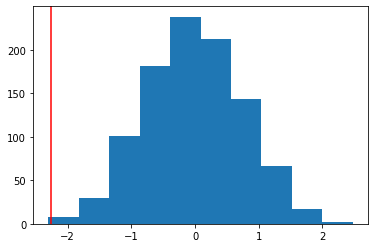

In [14]:
simple_obs = ols("overall~preferred_foot",data = model_data).fit().params[1]
def randomize_column (df,colname):
    df_copy = df.copy()
    var = df_copy[colname].values
    np.random.shuffle(var)
    return df_copy

randomization_tests = np.zeros(1000)
for i in range(1000):
        D=randomize_column(model_data,'preferred_foot')
        shuffle = ols('overall ~ preferred_foot',data = D).fit()
        randomization_tests[i]=shuffle.params[1]
        


randomization_tests
plt.hist(randomization_tests)
plt.axvline(simple_obs, color = 'red')



p_value = np.mean(np.abs(randomization_tests)>np.abs(simple_obs))
print('the p value of preferred_foot is: ', p_value)




### Part G

Your findings from the randomization test are incredible; left footed players are on average 2.5 points better than their right footed counterparts!  The management is prepared to spend a lot of money to replace the team full of lefties in order to gain a slight advantage.

However, you have a sneaking suspicion this isn't the whole story.  Before management replaces the entire team, you decide to take a look at the dataset from your predictive model, called `footballer_data.csv`.  Load that data, clean it up as you did in part A, and perform another regression of overall onto preferred_foot, this time controlling for age (including the quadratic term) and interceptions.  Answer the following in a markdown cell:

* What is the p-value for the effect of being right footed?  
* What does that mean in terms of the null hypothesis?


In [15]:
df = pd.read_csv('footballer_data.csv')
full_data = df.drop(['ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'], axis = 'columns')
model_data = ols('overall ~ preferred_foot + age + np.power(age,2) + interceptions', data = full_data).fit().summary()
print(model_data)



                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     2157.
Date:                Mon, 02 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:23:22   Log-Likelihood:                -56885.
No. Observations:               17994   AIC:                         1.138e+05
Df Residuals:                   17989   BIC:                         1.138e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

the p value is 0.243, we should not reject the null hypothesis and deduct that the left foot is not significant toward the overall performance.

### Part H

The club owner, Owen Owner, saw the results of your randomization test and is convinced that he should replace the whole team with left-footed players. Using your results from Part G, write an email explaining to him why this isn't a worthwhile endeavour. 



Dear Owen Owner,

Thank you for taking the time to look at my statistical analysis. Regarding the club's preference for left-footed players as a result of the randomization test you saw in the randomlization test, we see that prefer_foot is significant toward player overall performance, but it doesn't involve the control for others variable. in the second model when we control the interception and age variable. the prefer_foot variable become not significant toward the player overall performance.

Sincerely,

Junior Data Scientist